## JOBSHEET 9 : SVM DAN NAIVE BAYES



### LATIHAN

#### 1. Percobaan 1 : Implementasi Support Vector Machine (SVM)

Pada latihan kali ini kita akan menggunakan dataset Pima Indian Diabetes yang dapat diunduh pada tautan berikut : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. Dataset terdiri dari 9 kolom yang kesemuanya adalah data numerik.
Langkah pertama  impor library pandas dan ubah file csv menjadi dataframe dengan code berikut.



In [75]:
import pandas as pd
 
# Membaca file diabetes.csv
df = pd.read_csv('diabetes.csv')

Lalu kita tampilkan 5 baris teratas dari dataframe untuk melihat isi dari dataset. Untuk melakukannya kita dapat menjalankan kode `df.head()` seperti di bawah

In [76]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Hal paling penting selanjutnya adalah kita perlu mengecek apakah terdapat nilai-nilai yang hilang pada dataset serta apakah ada atribut yang bukan berisi bilangan numerik. Kita bisa melakukan ini dengan memanggil fungsi `df.info()` pada dataframe.


In [77]:
# menampilkan info dari tiap kolom
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Output dari fungsi info() menunjukkan bahwa semua atribut nilainya lengkap, dan juga nilai-nilai dari tiap kolom memiliki tipe data numerik yaitu int64 dan float64.

Pada tahap ini data sudah bisa dipakai untuk pelatihan model.

Kita lalu memisahkan antara atribut dan label pada dataframe. Untuk memisahkan kolom-kolom pada dataframe kamu bisa melihat dokumentasinya pada tautan ini : https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html.


In [78]:
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']


Jika kita lihat, nilai-nilai pada dataset memiliki skala yang berbeda. Contohnya pada kolom Glucose dan kolom Diabetes Pedigree Function. Kita perlu mengubah nilai-nilai dari setiap atribut berada pada skala yang sama. Kita dapat mencoba menggunakan standarisasi dengan fungsi `StandardScaler()` dari SKLearn

In [79]:
from sklearn.model_selection import train_test_split
 
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


Kita kemudian membuat objek _Support Vector Classifier_ dan menampungnya pada variabel clf. Akhirnya kita sampai pada tahapan yang kita tunggu-tunggu, kita memanggil fungsi fit untuk melatih model. 

In [80]:
from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Terakhir, kita bisa melihat bagaimana akurasi prediksi dari model yang kita latih terhadap data testing.

In [81]:
# Menampilkan skor akurasi prediksi
 
clf.score(X_test, y_test)


0.7440944881889764

#### Tugas Praktikum : 1.	Pada praktikum percobaan 1 dan percobaan 2 yaitu implementasi algoritma SVM dan SVR anda telah mendapatkan nilai akurasi dari model. Carilah parameter pada algoritma SVM dan SVR sampai anda mendapatkan nilai akurasi terbaik dari kedua algoritma tersebut. 


##### Meningkatkan akurasi SVM

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Membaca dataset
df = pd.read_csv('diabetes.csv')

# Memisahkan fitur dan label
X = df[df.columns[:8]]
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid kecil untuk mempercepat pencarian
param_grid = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.1]
}

# Grid Search dengan semua core CPU
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluasi hasil terbaik
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_ * 100  # konversi ke persen

# Model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100  # konversi ke persen

print("Best Parameters:", grid_search.best_params_) 
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nDalam Persen :")
# Cetak hasil
print(f"Best Cross-Validation Accuracy: {best_cv_score:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.7723396154578336
Test Accuracy: 0.7519685039370079

Dalam Persen :
Best Cross-Validation Accuracy: 77.23%
Test Accuracy: 75.20%


#### 2.	Percobaan 2 : Implementasi Support Vector Regression (SVR)

Dataset yang akan kita gunakan adalah data tentang lama kerja seseorang dan gajinya. Dataset ini dapat diunduh pada tautan berikut : https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression.

Setelah mengunggah dataset yang sudah di-unzip pada Google Colaboratory, pada cell pertama notebook kita impor library dasar yang dibutuhkan. Jangan lupa untuk mengubah berkas csv dari dataset menjadi dataframe Pandas.


In [83]:
import pandas as pd
 
# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv('Salary_Data.csv')


Selanjutnya kita bisa melihat apakah terdapat missing value pada dataset dengan fungsi `.info()`. Keluaran dari cell di bawah menunjukkan bahwa tidak ada missing value pada dataset.

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


Selanjutnya kita tampilkan 5 baris pertama dari dataframe.


In [85]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Kemudian kita pisahkan antara atribut dan label yang ingin diprediksi. Ketika hanya terdapat satu atribut pada dataframe, maka atribut tersebut perlu diubah bentuknya agar bisa diterima oleh model dari library SKLearn. Untuk mengubah bentuk atribut kita membutuhkan library numpy.

In [86]:
import numpy as np
 
# memisahkan atribut dan label
y = data['Salary']
 
X = data['YearsExperience']
# mengubah bentuk atribut
X = X.values[:,np.newaxis]



Berikutnya kita buat objek support vector regression dan di sini kita akan mencoba menggunakan parameter `C = 1000`, `gamma = 0.05`, dan `kernel ‘rbf’`. Setelah model dibuat kita akan melatih model dengan fungsi fit pada data.

In [87]:
from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
model  = SVR(C=1000, gamma=0.05, kernel='rbf')
 
# melatih model dengan fungsi fit
model.fit(X,y)



,kernel,'rbf'
,degree,3
,gamma,0.05
,coef0,0.0
,tol,0.001
,C,1000
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


Terakhir kita bisa memvisualisasikan bagaimana model SVR kita menyesuaikan terhadap pola yang terdapat pada data menggunakan library matplotlib.

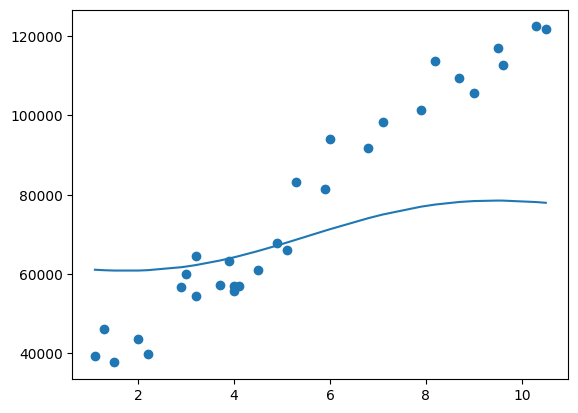

In [88]:
import matplotlib.pyplot as plt
 
# memvisualisasikan model
plt.scatter(X, y)
plt.plot(X, model.predict(X))


Hasil visualisasi menunjukkan bahwa model yang kita kembangkan, belum mampu menyesuaikan terhadap pola pada data dengan baik. 

##### Menaikkan akurasi algoritma SVR

In [89]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load data
data = pd.read_csv('Salary_Data.csv')
X = data[['YearsExperience']].values  # 2D
y = data['Salary'].values

# Normalisasi
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Grid Search
param_grid_svr = {
    'C': [0.1, 1, 10, 1000],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=5)
grid_svr.fit(X_scaled, y_scaled)

# Evaluasi
y_pred_scaled = grid_svr.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
r2 = r2_score(y, y_pred) * 100

print("R2 Score terbaik SVR:", r2)
print("Parameter terbaik SVR:", grid_svr.best_params_)

print(f"R2 Score terbaik SVR dalam persen: {r2:.2f}%")


R2 Score terbaik SVR: 95.52076806566936
Parameter terbaik SVR: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
R2 Score terbaik SVR dalam persen: 95.52%


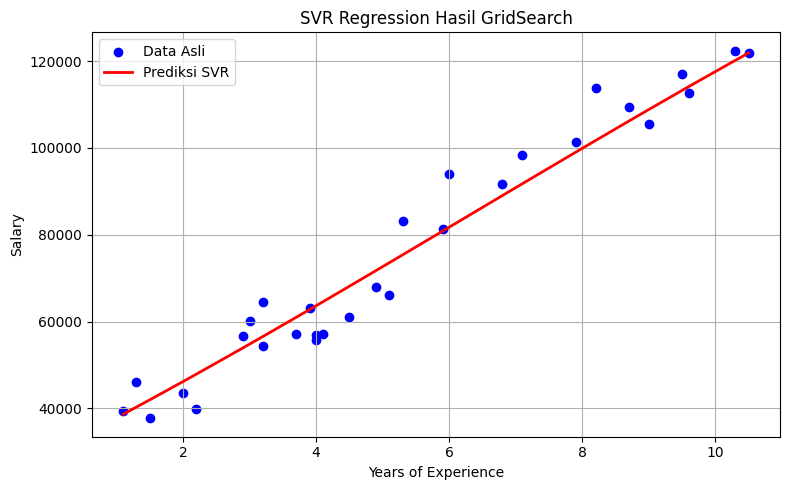

In [90]:
import matplotlib.pyplot as plt

# Prediksi terbaik dari model hasil GridSearchCV
best_model = grid_svr.best_estimator_
y_pred_scaled = best_model.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Visualisasi
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, y_pred, color='red', linewidth=2, label='Prediksi SVR')
plt.title('SVR Regression Hasil GridSearch')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3.	Percobaan 3 : Implementasi Naïve Bayes

Dataset yang kita pakai untuk belajar mengimplementasikan naïve bayes dapat diunduh disini : https://afandistudio.net/prak_ai/iklan_sosmed.csv . Pada dataset tersebut terdapat data jenis kelamin, umur, dan gaji untuk menentukan apkah calon konsumen melakukan transaksi atau tidak. 

Langkah pertama yang harus kita lakukan adalah meng-import library yang dibutuhkan seperti kode berikut.

In [91]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Selanjutnya kita load dataset yang kita gunakan. Dikarenakan dataset dalam bentuk CSV dan dipisahkan dengan titik koma (;) maka kita tambahkan parameter delimiter.

In [92]:
# load dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')
dataset.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


Kita pisahkan data fitur dan data label. Data fitur yang kita pakai adalah umur dan gaji, maka kita gunakan `iloc[:, 2:-1]` untuk menyeleksi kolom umur dan gaji, kemudian disimpan pada variabel X. Sebaliknya untuk data label kita simpan dapat variabel y. Data label yang kita pakai adalah kolom Transaksi.

In [93]:
X = dataset.iloc[:,2:-1]
y = dataset.iloc[:, -1]


Proses selanjutnya kita bagi dataset menjadi data latih dan data uji dengan prosentase 80:20.

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


Kita ubah dataframe pandas menjadi `np.array` untuk mempercepat prose pelatihan model.

In [95]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values


Dikarenakan jangkauan data dari umur dan gaji sangat jauh, oleh karena itu kita lakukan normalisasi untuk menyamakan skala data. Gunakan fungsi MinMaxScaler untuk menyamakan skala data.

In [96]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Setelah skala data sama, selanjutnya dilakukan proses pelatihan model menggunakan algoritma naïve bayes. Kita menggunakan gaussian naïve bayes dikarena data yang dipakai adalah data numerik.


In [97]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


Untuk melihat hasil prediksi algoritma naïve bayes, kita buat objek bernama y_pred yang berisi data hasil prediksi X_test.

In [98]:
# prediksi X_test
y_pred = classifier.predict(X_test)


Kita coba bandingkan hasil prediksi dengan data sesungguhnya

In [99]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [100]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

Buat confussion matrix untuk melihat jumlah perbandingan hasil prediksi dengan data sesungguhnya. Kemudian hitung akurasi skor berdasarkan hasil confussion matrix.

In [101]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)



Akurasi : 87.5%
Confussion Matrix : 
[[52  4]
 [ 6 18]]


Akurasi model sudah cukup tinggi, namun masih dapat ditingkatkan dengan menambahkan hyperparameter tunning.

Langkah terakhir kita buat visualisasi hasil evaluasi model pada data latih dan data uji sebagai berikut.


C:\Users\azkbr\AppData\Local\Temp\ipykernel_9268\706575882.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


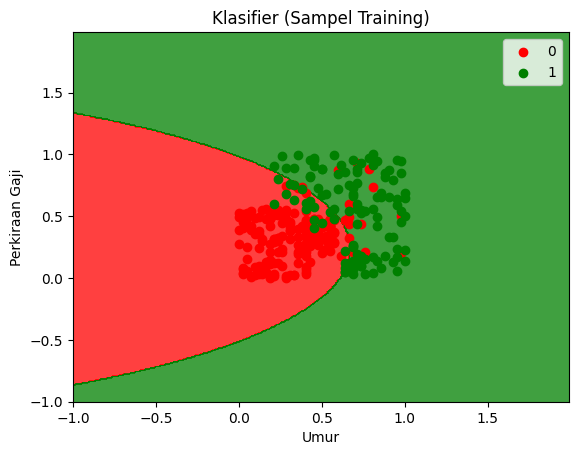

In [102]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()



C:\Users\azkbr\AppData\Local\Temp\ipykernel_9268\1137279309.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


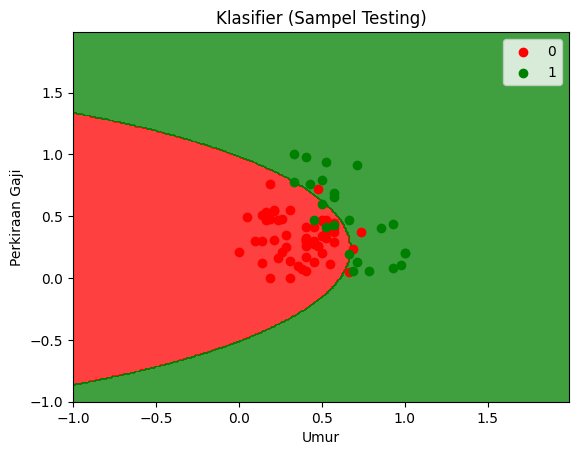

In [103]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Testing)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()



#### Tugas Praktikum : Pada praktikum percobaan 3 yaitu implementasi algoritma Naïve Bayes anda telah mendapatkan nilai akurasi yang cukup tinggi, namun hasil akurasi tersebut masih dapat ditinggkatkan menggunakan hyperparameter tunning. Carilah parameter pada algoritma Naïve Bayes sampai anda mendapatkan nilai akurasi yang lebih tinggi daripada nilai akurasi pada percobaan.

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definisikan grid parameter untuk var_smoothing
# Biasanya nilai sangat kecil, coba dalam skala logaritmik
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100), # Dari 1.0 ke 1e-9
    'priors': [
        None, # Biarkan model menghitung priors dari data (default)
        [0.8, 0.2], # Contoh: jika kelas 0 = 80%, kelas 1 = 20%
        [0.7, 0.3],
        [0.6, 0.4],
        [0.5, 0.5]  # Contoh: jika kelas seimbang
        # Anda bisa menambahkan kombinasi lain berdasarkan class_counts Anda
    ]
}

nb_clf = GaussianNB()
grid_search_nb = GridSearchCV(nb_clf, param_grid_nb, cv=5, scoring='accuracy', verbose=1)
grid_search_nb.fit(X_train, y_train)

print("\n--- Hasil Grid Search GaussianNB ---")
print("Parameter terbaik: ", grid_search_nb.best_params_)
print("Skor akurasi terbaik (training CV): {:.2f}%".format(grid_search_nb.best_score_ * 100))

# Prediksi dengan model terbaik
y_pred_best_nb = grid_search_nb.predict(X_test)
acc_best_nb = accuracy_score(y_test, y_pred_best_nb)
print("Akurasi terbaik di data test (baru): {:.2f}%".format(acc_best_nb * 100))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits

--- Hasil Grid Search GaussianNB ---
Parameter terbaik:  {'priors': [0.5, 0.5], 'var_smoothing': np.float64(0.2848035868435802)}
Skor akurasi terbaik (training CV): 90.94%
Akurasi terbaik di data test (baru): 91.25%


C:\Users\azkbr\AppData\Local\Temp\ipykernel_9268\759007802.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


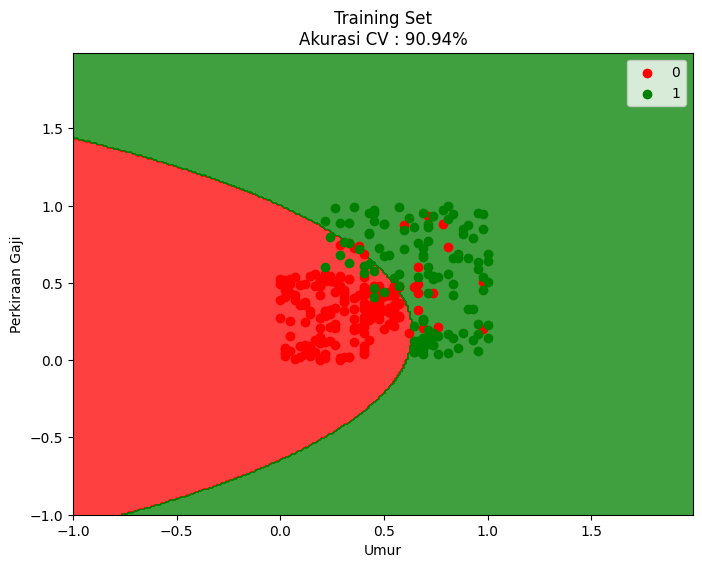

In [122]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi hasil klasifikasi data training
X_set, y_set = X_train, y_train

# Buat mesh grid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(
    X1, X2,
    grid_search_nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)

# Atur batas sumbu
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot titik-titik data training
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )

# Judul dan label
plt.title(f'Training Set\nAkurasi CV : {grid_search_nb.best_score_ * 100:.2f}%')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()


C:\Users\azkbr\AppData\Local\Temp\ipykernel_9268\4005089420.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


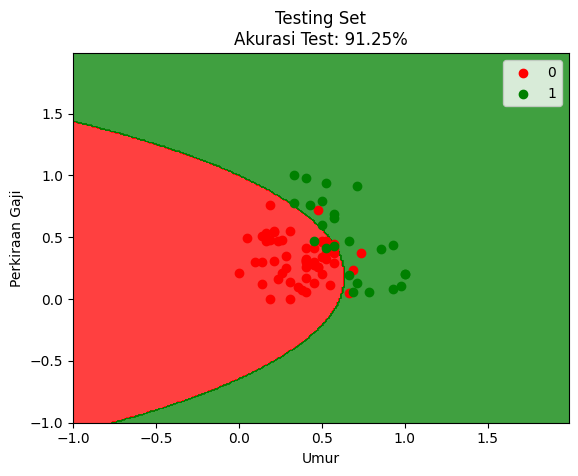

In [124]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi hasil klasifikasi data testing
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(
    X1, X2, grid_search_nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )
plt.title(f'Testing Set\nAkurasi Test: {acc_best_nb * 100:.2f}%')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()
